# Objective 1.1: Characterize distributions of lifestyle behaviors and socioeconomic indicators.
- To describe how lifestyle (physical activity, sleep, diet) and socioeconomic factors (income, education, insurance) are distributed in the population. 

## Step 1: Import and Set Up

In [1]:
# Setup environment and imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys
import squarify

# Add the 'scripts' folder to the Python path
scripts_path = Path("../scripts").resolve()
if str(scripts_path) not in sys.path:
    sys.path.append(str(scripts_path))

from db_utils import create_connection_from_script, close_connection, run_query
from config import (
    FINAL_DATA_DIR,   
    PLOTS_DIR

)

# Display full columns in pandas
pd.set_option('display.max_columns', None)

print("Setup complete.")


All required directories are ready.
Setup complete.


## Step 2: Load the lifestyle and socio-economic csv file for analysing the Objective 1.1

In [2]:
# Read the csv file into the dataframe

file_path = FINAL_DATA_DIR / "lifestyle_socio_economic.csv"
if not file_path.exists():
    raise FileNotFoundError(f"File not found: {file_path}")
df = pd.read_csv(file_path)

# preview the first few rows of a DataFrame.
df.head()

,participant_id,age,gender,race_ethnicity,education_level,poverty_income_ratio,pir_category,interview_sample_weight,has_health_insurance,sleep_avg_hr,sleep_category,activity_level,total_weekly_min,diet_score,diet_category
0,130378,43,Male,Non-Hispanic Asian,College graduate or above,5.00,Very High,50055.450807,Yes,9.357143,Long Sleep,Low active,135.0,1.0,Unhealthy
1,130379,66,Male,Non-Hispanic White,College graduate or above,5.00,Very High,29087.450605,Yes,9.000000,Normal Sleep,Moderately active,180.0,3.0,Healthy
2,130380,44,Female,Other Hispanic,High school/GED,1.41,Mid,80062.674301,Yes,8.285714,Normal Sleep,Low active,20.0,1.0,Unhealthy
3,130386,34,Male,Mexican American,Some college/AA degree,1.33,Mid,30995.282610,Yes,7.642857,Normal Sleep,Low active,30.0,3.0,Healthy
4,130387,68,Female,Non-Hispanic White,College graduate or above,1.32,Mid,19896.970559,Yes,3.571429,Short Sleep,NaN,NaN,1.0,Unhealthy


### Step 3: Data Analysis

### Descriptive Statistics

In [3]:
obj1_df = df.copy()
print("=== DEMOGRAPHICS & SOCIOECONOMIC STATUS ===")
# Gender
gender_counts = obj1_df["gender"].value_counts()
gender_percent = obj1_df["gender"].value_counts(normalize=True) * 100
print("\nGender Distribution:")
print(pd.concat([gender_counts, gender_percent.round(2)], axis=1, keys=["Count", "Percent (%)"]))

# Race/Ethnicity
race_counts = obj1_df["race_ethnicity"].value_counts()
race_percent = obj1_df["race_ethnicity"].value_counts(normalize=True) * 100
print("\nRace/Ethnicity Distribution:")
print(pd.concat([race_counts, race_percent.round(2)], axis=1, keys=["Count", "Percent (%)"]))

# Education Level
edu_counts = obj1_df["education_level"].value_counts()
edu_percent = obj1_df["education_level"].value_counts(normalize=True) * 100
print("\nEducation Level Distribution:")
print(pd.concat([edu_counts, edu_percent.round(2)], axis=1, keys=["Count", "Percent (%)"]))

# Income-to-Poverty Ratio (PIR)
print("\nPoverty Income Ratio (PIR) - Summary:")
print(obj1_df["poverty_income_ratio"].describe().round(2))

# Health Insurance
insurance_counts = obj1_df["has_health_insurance"].value_counts()
insurance_percent = obj1_df["has_health_insurance"].value_counts(normalize=True) * 100
print("\nHealth Insurance Coverage:")
print(pd.concat([insurance_counts, insurance_percent.round(2)], axis=1, keys=["Count", "Percent (%)"]))

# --------------------------------------------------------------------

print("\n=== LIFESTYLE BEHAVIORS ===")

# Sleep Average (continuous)
print("\nSleep Duration (Average Hours per Day):")
print(obj1_df["sleep_avg_hr"].describe().round(2))

# Sleep Category
sleep_cat_counts = obj1_df["sleep_category"].value_counts()
sleep_cat_percent = obj1_df["sleep_category"].value_counts(normalize=True) * 100
print("\nSleep Duration Category:")
print(pd.concat([sleep_cat_counts, sleep_cat_percent.round(2)], axis=1, keys=["Count", "Percent (%)"]))

# Physical Activity (weekly minutes)
print("\nPhysical Activity (Total Weekly Minutes):")
print(obj1_df["total_weekly_min"].describe().round(2))

# Activity Level
activity_counts = obj1_df["activity_level"].value_counts()
activity_percent = obj1_df["activity_level"].value_counts(normalize=True) * 100
print("\nPhysical Activity Level:")
print(pd.concat([activity_counts, activity_percent.round(2)], axis=1, keys=["Count", "Percent (%)"]))

# Diet Score
print("\nDiet Score Summary:")
print(obj1_df["diet_score"].describe().round(2))

# Diet Category
diet_cat_counts = obj1_df["diet_category"].value_counts()
diet_cat_percent = obj1_df["diet_category"].value_counts(normalize=True) * 100
print("\nDiet Quality Category:")
print(pd.concat([diet_cat_counts, diet_cat_percent.round(2)], axis=1, keys=["Count", "Percent (%)"]))


=== DEMOGRAPHICS & SOCIOECONOMIC STATUS ===

Gender Distribution:
        Count  Percent (%)
gender                    
Female   3344        55.15
Male     2720        44.85

Race/Ethnicity Distribution:
                    Count  Percent (%)
race_ethnicity                        
Non-Hispanic White   3569        58.86
Non-Hispanic Black    753        12.42
Other Hispanic        614        10.13
Mexican American      405         6.68
Other/Multi-Racial    388         6.40
Non-Hispanic Asian    335         5.52

Education Level Distribution:
                           Count  Percent (%)
education_level                              
College graduate or above   2143        35.34
Some college/AA degree      1846        30.44
High school/GED             1297        21.39
9-11th grade                 482         7.95
<9th grade                   292         4.82
Missing                        4         0.07

Poverty Income Ratio (PIR) - Summary:
count    6064.00
mean        2.91
std         

### Distribution Visualization

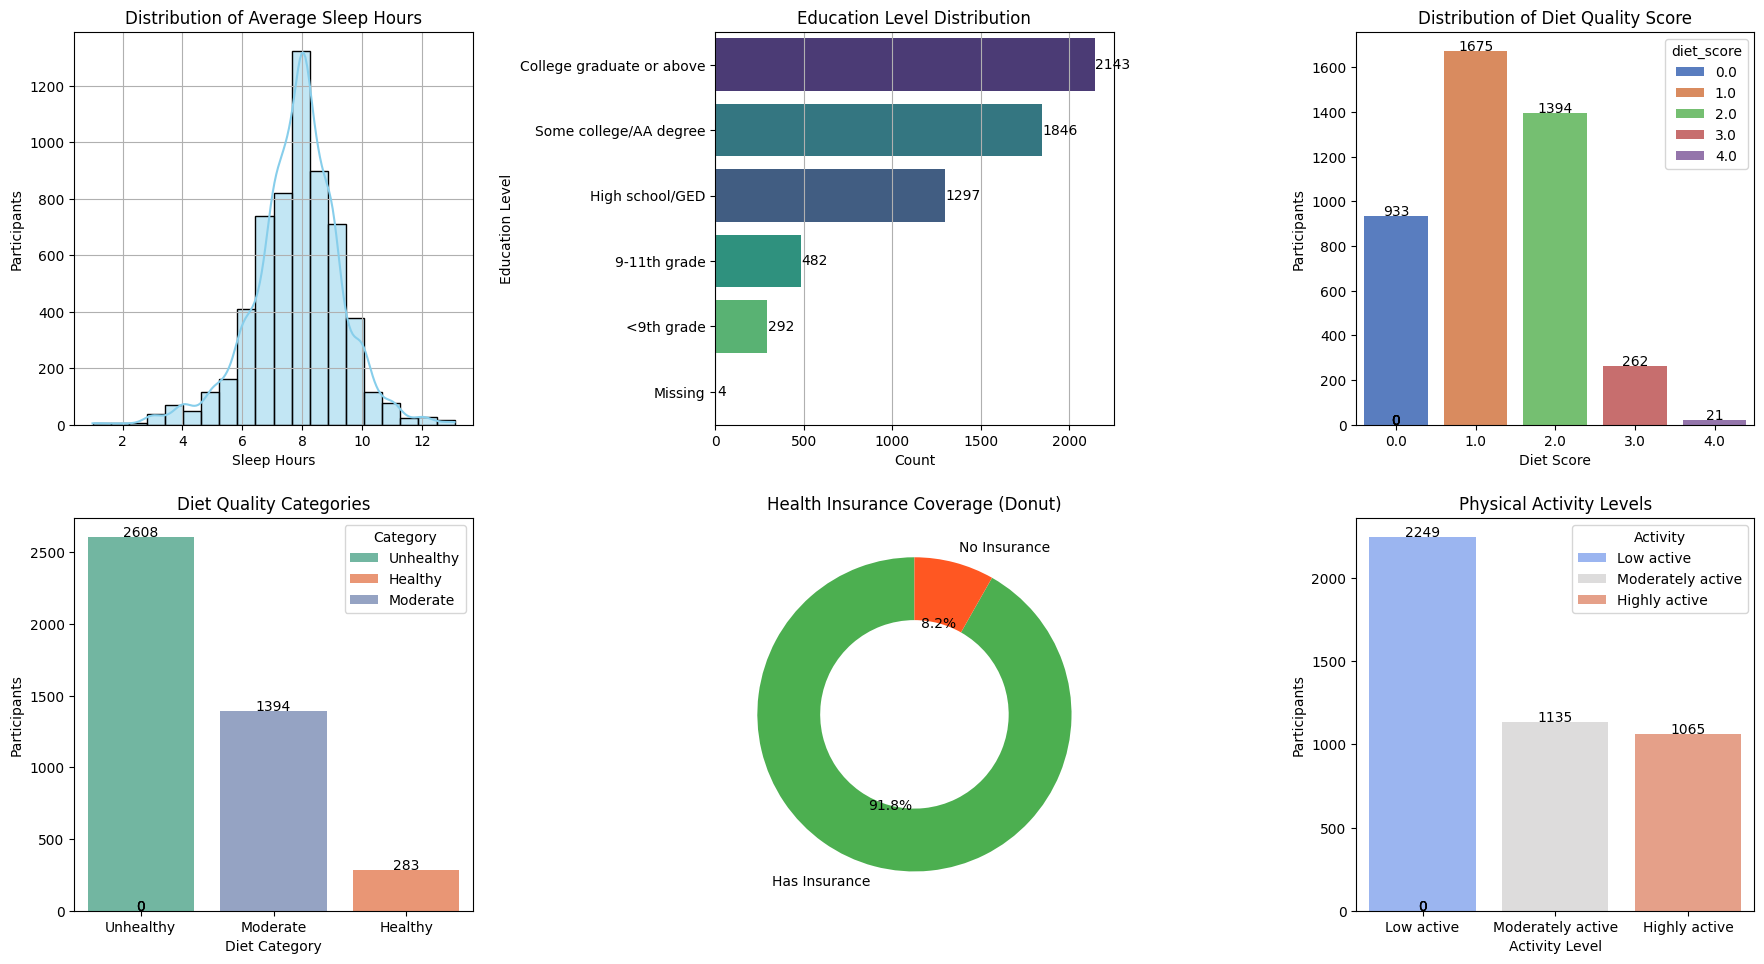

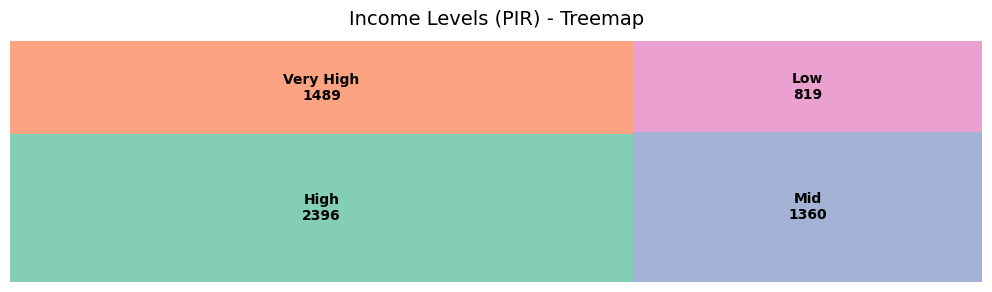

Plots saved to C:\Users\sahil\Documents\CodeYou-Project\DA_Projects\health_track\outputs\plots


In [4]:
# ========== Grid of 6 Lifestyle/Socio-Economic Plots ==========
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# 1. Sleep Histogram
sns.histplot(obj1_df["sleep_avg_hr"], kde=True, bins=20, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title("Distribution of Average Sleep Hours")
axs[0, 0].set_xlabel("Sleep Hours")
axs[0, 0].set_ylabel("Participants")
axs[0, 0].grid(True)

# 2. Education Level (Horizontal Bar)
sns.countplot(data=obj1_df, y="education_level", hue="education_level",
              order=obj1_df["education_level"].value_counts().index,
              palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title("Education Level Distribution")
axs[0, 1].set_xlabel("Count")
axs[0, 1].set_ylabel("Education Level")
axs[0, 1].grid(True, axis='x')
# Add count labels on horizontal bars
for p in axs[0, 1].patches:
    width = p.get_width()
    axs[0, 1].text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')

# 3. Diet Score (Vertical Bars)
sns.countplot(data=obj1_df, x='diet_score', hue='diet_score', palette='muted', ax=axs[0, 2])
axs[0, 2].set_title('Distribution of Diet Quality Score')
axs[0, 2].set_xlabel('Diet Score')
axs[0, 2].set_ylabel('Participants')
# Add count labels on vertical bars
for p in axs[0, 2].patches:
    height = p.get_height()
    axs[0, 2].text(p.get_x() + p.get_width()/2, height + 2, int(height), ha='center')

# 4. Diet Category (Vertical Bars)
sns.countplot(data=obj1_df, x='diet_category',
              hue='diet_category',
              order=['Unhealthy', 'Moderate', 'Healthy'],
              palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title('Diet Quality Categories')
axs[1, 0].set_xlabel('Diet Category')
axs[1, 0].set_ylabel('Participants')
axs[1, 0].legend(title='Category')
# Add count labels on vertical bars
for p in axs[1, 0].patches:
    height = p.get_height()
    axs[1, 0].text(p.get_x() + p.get_width()/2, height + 2, int(height), ha='center')

# 5. Health Insurance Donut
insurance_counts = obj1_df['has_health_insurance'].value_counts()
colors = ['#4CAF50', '#FF5722']
axs[1, 1].pie(insurance_counts, labels=['Has Insurance', 'No Insurance'],
             autopct='%1.1f%%', startangle=90, colors=colors,
             wedgeprops={'width': 0.4})
axs[1, 1].set_title('Health Insurance Coverage (Donut)')

# 6. Physical Activity (Vertical Bars)
sns.countplot(data=obj1_df, x='activity_level',
              hue='activity_level',
              order=obj1_df['activity_level'].value_counts().index,
              palette='coolwarm', ax=axs[1, 2])
axs[1, 2].set_title('Physical Activity Levels')
axs[1, 2].set_xlabel('Activity Level')
axs[1, 2].set_ylabel('Participants')
axs[1, 2].legend(title='Activity')
# Add count labels on vertical bars
for p in axs[1, 2].patches:
    height = p.get_height()
    axs[1, 2].text(p.get_x() + p.get_width()/2, height + 2, int(height), ha='center')

# Save 6-in-1 plot
plt.tight_layout(pad=2.0)
six_plot_path = PLOTS_DIR / "obj_1.1_lifestyle_and_socio_economic_normal_distribution.png"
plt.savefig(six_plot_path, dpi=300)
plt.show()
plt.close()

# ========== Treemap: Income Level ==========
income_counts = obj1_df['pir_category'].value_counts()
labels = [f'{cat}\n{count}' for cat, count in zip(income_counts.index, income_counts.values)]

plt.figure(figsize=(10, 3))
squarify.plot(
    sizes=income_counts.values,
    label=labels,
    alpha=0.8,
    color=sns.color_palette('Set2'),
    text_kwargs={'fontsize': 10, 'weight': 'bold', 'color': 'black'}
)
plt.axis('off')
plt.title('Income Levels (PIR) - Treemap', fontsize=14, pad=12)
plt.tight_layout(pad=1)

treemap_path = PLOTS_DIR / "obj_1.l_income_treemap.png"
plt.savefig(treemap_path, dpi=300)
plt.show()
plt.close()

# ========== Sunburst: Gender vs Health Insurance ==========
sunburst_df = obj1_df.dropna(subset=['gender', 'has_health_insurance'])
fig = px.sunburst(
    sunburst_df,
    path=['gender', 'has_health_insurance'],
    color='has_health_insurance',
    color_discrete_map={'Yes': '#4CAF50', 'No': '#FF5722'},
    title='Health Insurance Coverage by Gender'
)

fig.update_layout(
    margin=dict(t=50, l=10, r=10, b=10),
    title_font_size=18,
    uniformtext=dict(minsize=12, mode='hide'),
    width=960,
    height=288
)

sunburst_path = PLOTS_DIR / "obj_1.1_sunburst_insurance_by_gender.html"
fig.write_html(sunburst_path)
fig.show()

print(f"Plots saved to {PLOTS_DIR.resolve()}")


### Apply sample weights to analyze or summarize the data

In [5]:
from statsmodels.stats.weightstats import DescrStatsW

# Weighted mean and std for continuous variables using DescrStatsW
def weighted_mean_std(data, value_col, weight_col):
    df = data[[value_col, weight_col]].dropna()
    dsw = DescrStatsW(df[value_col], weights=df[weight_col], ddof=0)
    return round(dsw.mean, 2), round(dsw.std, 2)

# Weighted proportions for categorical variables using DescrStatsW
def weighted_proportions(data, cat_col, weight_col):
    df = data[[cat_col, weight_col]].dropna()
    categories = df[cat_col].unique()
    
    results = []
    for cat in categories:
        mask = df[cat_col] == cat
        dsw = DescrStatsW(mask.astype(int), weights=df[weight_col], ddof=0)
        weighted_percent = round(dsw.mean * 100, 2)
        weighted_count = round(dsw.sum, 0)
        results.append((cat, weighted_count, weighted_percent))
    
    return pd.DataFrame(results, columns=[cat_col, 'Weighted Count', 'Weighted Percent (%)'])
print("=== DEMOGRAPHICS & SOCIOECONOMIC STATUS (Weighted with DescrStatsW) ===")

print("\nGender Distribution:")
print(weighted_proportions(obj1_df, 'gender', 'interview_sample_weight'))

print("\nRace/Ethnicity Distribution:")
print(weighted_proportions(obj1_df, 'race_ethnicity', 'interview_sample_weight'))

print("\nEducation Level Distribution:")
print(weighted_proportions(obj1_df, 'education_level', 'interview_sample_weight'))

mean_pir, std_pir = weighted_mean_std(obj1_df, 'poverty_income_ratio', 'interview_sample_weight')
print(f"\nPoverty Income Ratio (PIR) - Weighted Mean: {mean_pir}, Weighted Std Dev: {std_pir}")

print("\nHealth Insurance Coverage:")
print(weighted_proportions(obj1_df, 'has_health_insurance', 'interview_sample_weight'))

print("\n=== LIFESTYLE BEHAVIORS (Weighted with DescrStatsW) ===")

mean_sleep, std_sleep = weighted_mean_std(obj1_df, 'sleep_avg_hr', 'interview_sample_weight')
print(f"\nSleep Duration (Average Hours per Day) - Weighted Mean: {mean_sleep}, Weighted Std Dev: {std_sleep}")

print("\nSleep Duration Category:")
print(weighted_proportions(obj1_df, 'sleep_category', 'interview_sample_weight'))

mean_pa, std_pa = weighted_mean_std(obj1_df, 'total_weekly_min', 'interview_sample_weight')
print(f"\nPhysical Activity (Total Weekly Minutes) - Weighted Mean: {mean_pa}, Weighted Std Dev: {std_pa}")

print("\nPhysical Activity Level:")
print(weighted_proportions(obj1_df, 'activity_level', 'interview_sample_weight'))

mean_diet, std_diet = weighted_mean_std(obj1_df, 'diet_score', 'interview_sample_weight')
print(f"\nDiet Score Summary - Weighted Mean: {mean_diet}, Weighted Std Dev: {std_diet}")

print("\nDiet Quality Category:")
print(weighted_proportions(obj1_df, 'diet_category', 'interview_sample_weight'))


=== DEMOGRAPHICS & SOCIOECONOMIC STATUS (Weighted with DescrStatsW) ===

Gender Distribution:
   gender  Weighted Count  Weighted Percent (%)
0    Male      91695704.0                 48.56
1  Female      97143693.0                 51.44

Race/Ethnicity Distribution:
       race_ethnicity  Weighted Count  Weighted Percent (%)
0  Non-Hispanic Asian      11738908.0                  6.22
1  Non-Hispanic White     114563698.0                 60.67
2      Other Hispanic      17995523.0                  9.53
3    Mexican American      13313140.0                  7.05
4  Non-Hispanic Black      19912135.0                 10.54
5  Other/Multi-Racial      11315993.0                  5.99

Education Level Distribution:
             education_level  Weighted Count  Weighted Percent (%)
0  College graduate or above      67663329.0                 35.83
1            High school/GED      47080639.0                 24.93
2     Some college/AA degree      56144845.0                 29.73
3            

### Apply sample weights to analyze or visualize the data

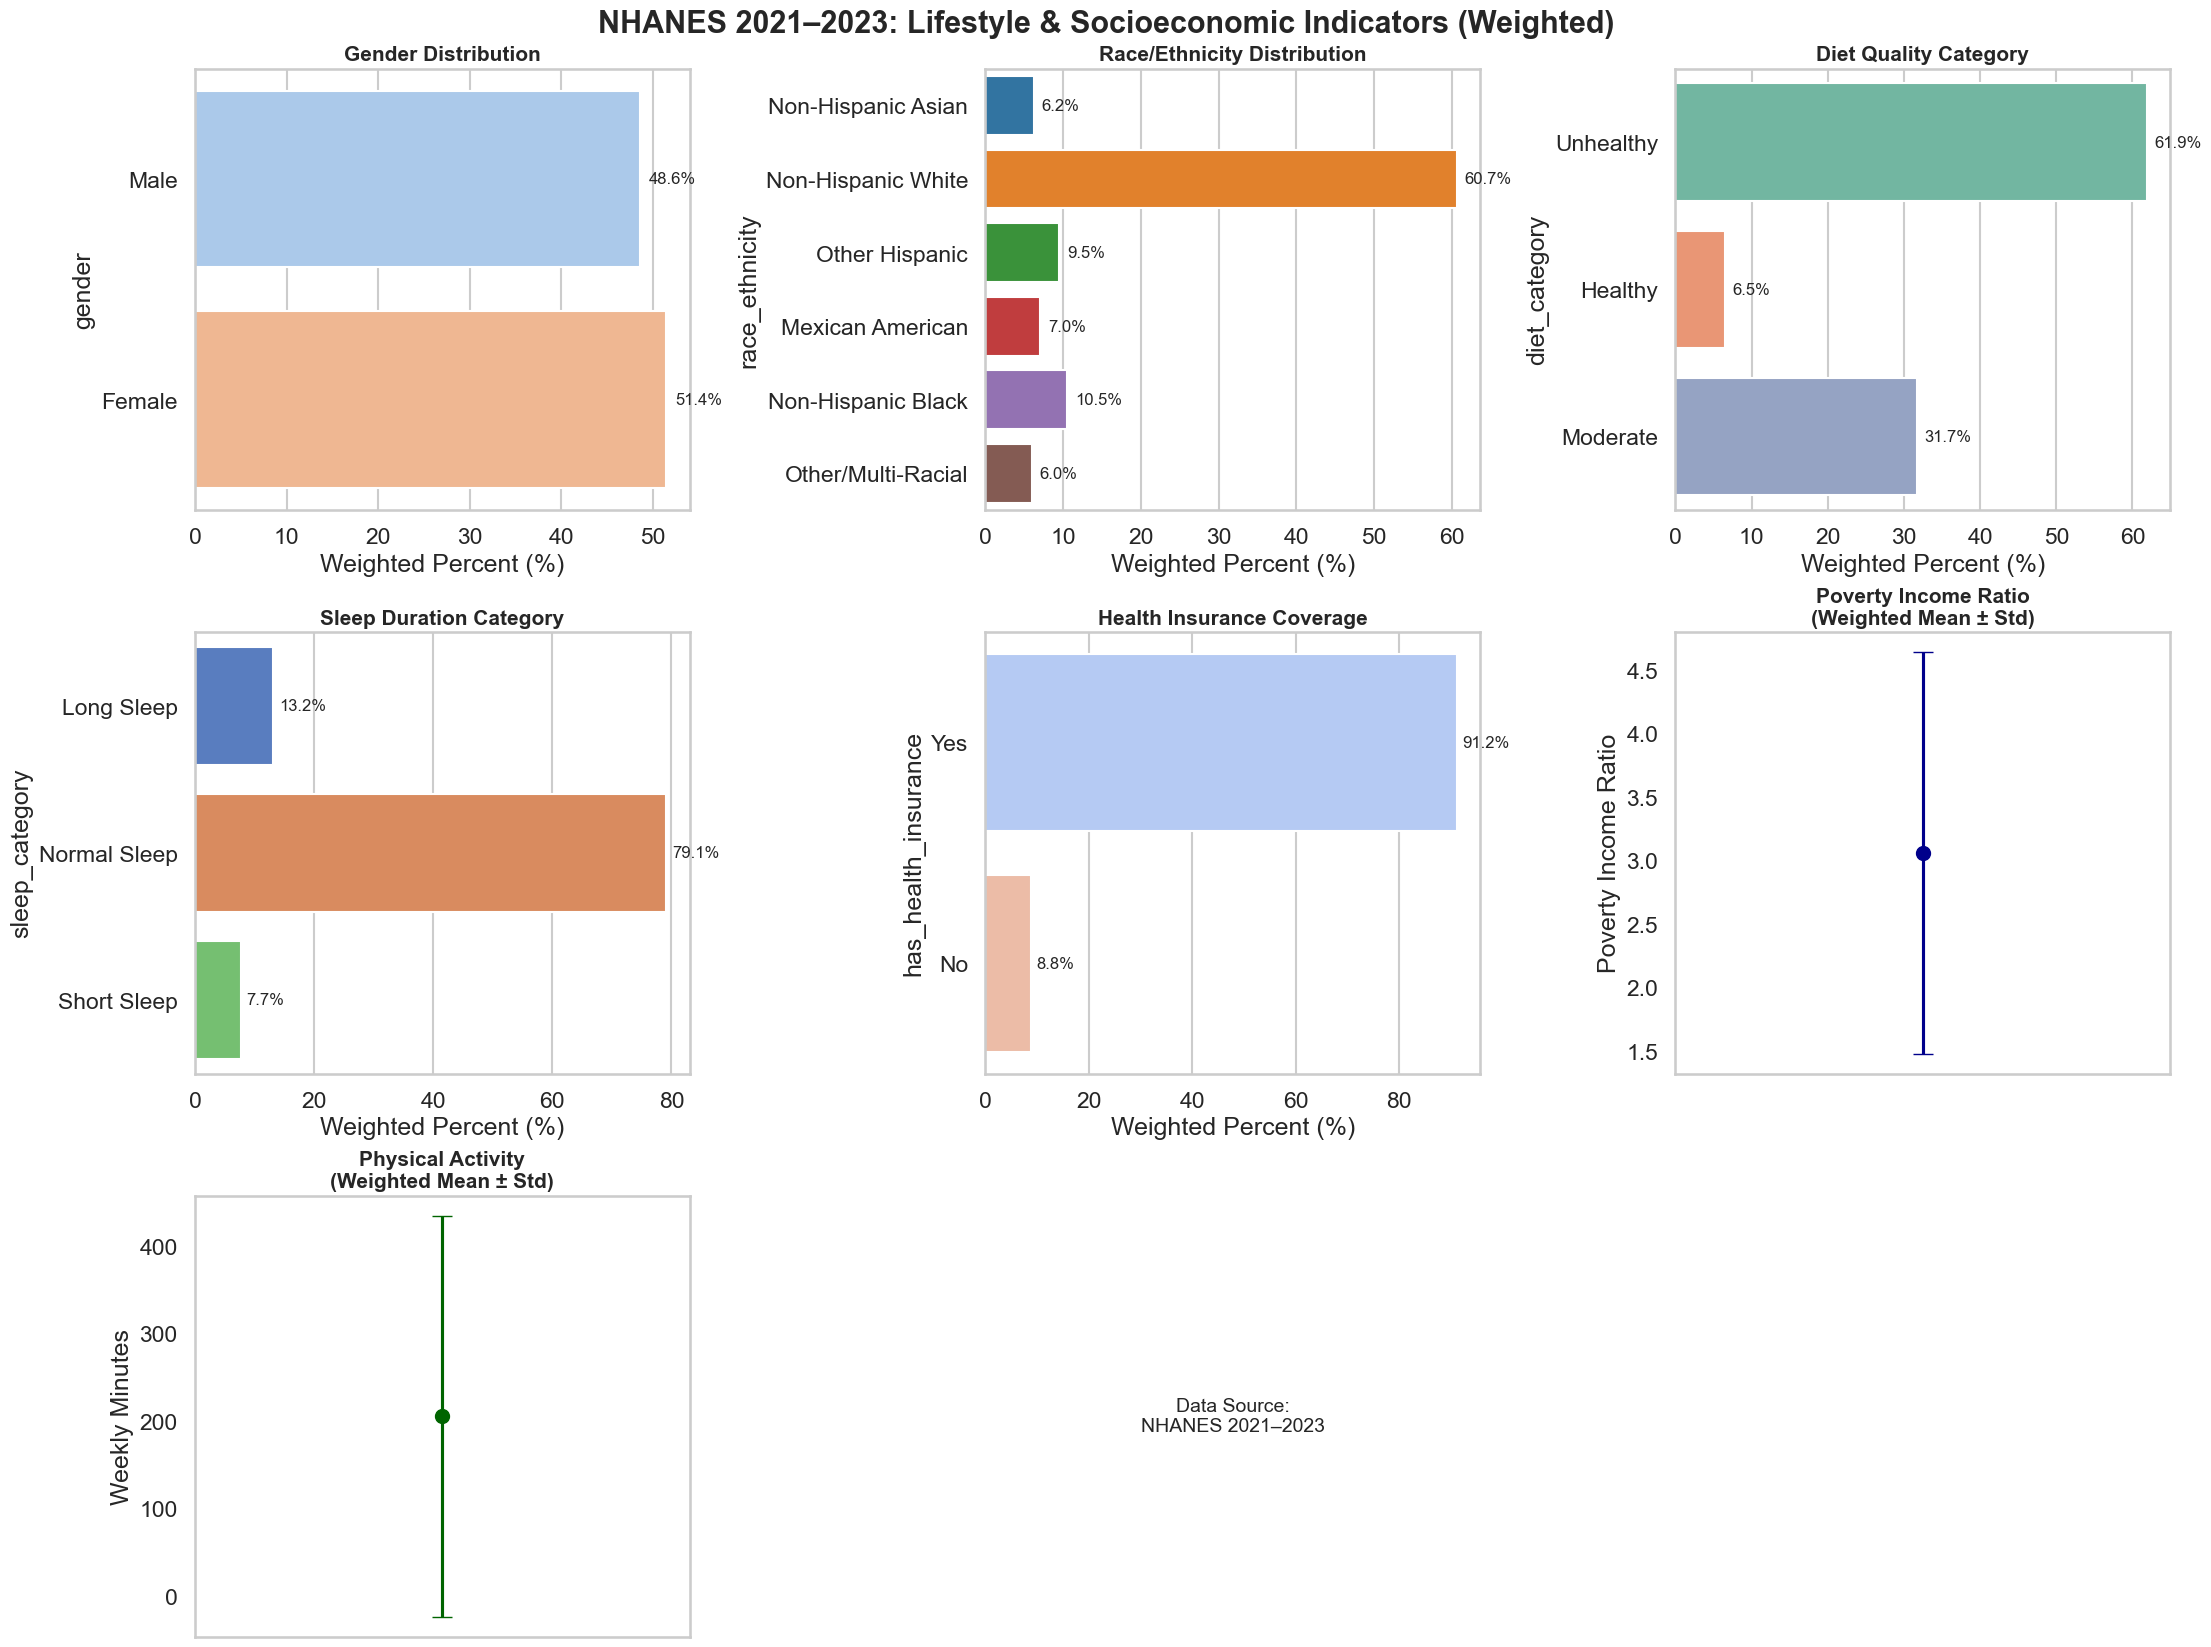

In [6]:
# Get weighted summaries as DataFrames
gender_df = weighted_proportions(obj1_df, 'gender', 'interview_sample_weight')
race_df = weighted_proportions(obj1_df, 'race_ethnicity', 'interview_sample_weight')
diet_cat_df = weighted_proportions(obj1_df, 'diet_category', 'interview_sample_weight')
sleep_cat_df = weighted_proportions(obj1_df, 'sleep_category', 'interview_sample_weight')
insurance_df = weighted_proportions(obj1_df, 'has_health_insurance', 'interview_sample_weight')

# Reset indices
gender_df = gender_df.reset_index(drop=True)
race_df = race_df.reset_index(drop=True)
diet_cat_df = diet_cat_df.reset_index(drop=True)
sleep_cat_df = sleep_cat_df.reset_index(drop=True)
insurance_df = insurance_df.reset_index(drop=True)

# Weighted means ± std
mean_pir, std_pir = weighted_mean_std(obj1_df, 'poverty_income_ratio', 'interview_sample_weight')
mean_pa, std_pa = weighted_mean_std(obj1_df, 'total_weekly_min', 'interview_sample_weight')

# Plot style
sns.set_style("whitegrid")
sns.set_context("talk")

# Create 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(22, 16), constrained_layout=True)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot 1: Gender
sns.barplot(x='Weighted Percent (%)', y='gender', hue='gender',
            data=gender_df, ax=axes[0],
            palette='pastel', legend=False)
axes[0].set_title('Gender Distribution', fontsize=15, weight='bold')
for i, val in enumerate(gender_df['Weighted Percent (%)']):
    axes[0].text(val + 1, i, f'{val:.1f}%', va='center', fontsize=12)

# Plot 2: Race/Ethnicity
sns.barplot(x='Weighted Percent (%)', y='race_ethnicity', hue='race_ethnicity',
            data=race_df, ax=axes[1],
            palette='tab10', legend=False)
axes[1].set_title('Race/Ethnicity Distribution', fontsize=15, weight='bold')
for i, val in enumerate(race_df['Weighted Percent (%)']):
    axes[1].text(val + 1, i, f'{val:.1f}%', va='center', fontsize=12)

# Plot 3: Diet Quality
sns.barplot(x='Weighted Percent (%)', y='diet_category', hue='diet_category',
            data=diet_cat_df, ax=axes[2],
            palette='Set2', legend=False)
axes[2].set_title('Diet Quality Category', fontsize=15, weight='bold')
for i, val in enumerate(diet_cat_df['Weighted Percent (%)']):
    axes[2].text(val + 1, i, f'{val:.1f}%', va='center', fontsize=12)

# Plot 4: Sleep Duration
sns.barplot(x='Weighted Percent (%)', y='sleep_category', hue='sleep_category',
            data=sleep_cat_df, ax=axes[3],
            palette='muted', legend=False)
axes[3].set_title('Sleep Duration Category', fontsize=15, weight='bold')
for i, val in enumerate(sleep_cat_df['Weighted Percent (%)']):
    axes[3].text(val + 1, i, f'{val:.1f}%', va='center', fontsize=12)

# Plot 5: Health Insurance
sns.barplot(x='Weighted Percent (%)', y='has_health_insurance', hue='has_health_insurance',
            data=insurance_df, ax=axes[4],
            palette='coolwarm', legend=False)
axes[4].set_title('Health Insurance Coverage', fontsize=15, weight='bold')
for i, val in enumerate(insurance_df['Weighted Percent (%)']):
    axes[4].text(val + 1, i, f'{val:.1f}%', va='center', fontsize=12)

# Plot 6: PIR
axes[5].errorbar(x=0, y=mean_pir, yerr=std_pir,
                 fmt='o', color='darkblue', capsize=7, markersize=10)
axes[5].set_xlim(-1, 1)
axes[5].set_xticks([])
axes[5].set_ylabel('Poverty Income Ratio')
axes[5].set_title('Poverty Income Ratio\n(Weighted Mean ± Std)', fontsize=15, weight='bold')
axes[5].grid(axis='y')

# Plot 7: Physical Activity
axes[6].errorbar(x=0, y=mean_pa, yerr=std_pa,
                 fmt='o', color='darkgreen', capsize=7, markersize=10)
axes[6].set_xlim(-1, 1)
axes[6].set_xticks([])
axes[6].set_ylabel('Weekly Minutes')
axes[6].set_title('Physical Activity\n(Weighted Mean ± Std)', fontsize=15, weight='bold')
axes[6].grid(axis='y')

# Plot 8: Info / Blank
axes[7].axis('off')
axes[7].text(0.5, 0.5, 'Data Source:\nNHANES 2021–2023', fontsize=14,
             ha='center', va='center', transform=axes[7].transAxes)

# Plot 9: Blank (can be used later)
axes[8].axis('off')

# Title
fig.suptitle("NHANES 2021–2023: Lifestyle & Socioeconomic Indicators (Weighted)",
             fontsize=22, weight='bold', y=1.02)

# Save and show
PLOTS_DIR.mkdir(parents=True, exist_ok=True)
plot_path = PLOTS_DIR / "obj_1.1_all_indicators_weighted_distribution.png"
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()
